# CS1F: Assessed exercise (Part 4)
This exercise is worth 8% of your mark in total for CS1F.
It should be completed in your assigned group.

This exercise has four stages, in consecutive CS1F lab sessions:

1. Designing a conceptual model of an interface.
2. Implementing a state machine.
3. Linking states to continuous control signals.
4. Experimental analysis of usability.

**You will require your results from previous weeks in each successive exercise!**

**This notebook will be submitted as your assessment for this part. Make sure you submit `4_experimental_analysis.ipynb` on Moodle.**

<img src="imgs/flashlight_design.png" width="60%">

# Details
This file will be submitted. **You must enter your details in this cell or your work cannot be marked.** List each team member in the form, `name: student_id` in the cell below. Double-click to edit the text. Add or remove lines as required.

### Your Name
* NAME: STUDENT_ID


## Experiment and analysis

In this lab, you will test your design from the previous weeks.  You will perform a simple experiment to evaluate the usability of your flashlight interface. 

### User exchange
To make the evaluation realistic, your design will be tested by a user from *another team*, who is not familiar with the design of your flashlight.   **Designate one member of your team as the experimental subject *now* and exchange them among teams; your tutor will coordinate which teams exchange with each other.**

---

Before starting the experiments, read the following carefully.

### Assumptions
We will make a number of simplifying assumptions to make this achievable in a single lab session.

* You will only test with a single **user**.  Real-world experiments would need many users to see how performance varied across users, and take into account demographic attributes of the user population (e.g. are elderly users slower at getting the flashlight turned on in an emergency?).

* You will only test your own **design**. Most real experiments would involve comparing multiple designs, with different tradeoffs among design parameters.

* You will have a predefined set of **tasks** to complete, like "switch the flashlight on, then off again". In a real evaluation, you would have to design the tasks yourself to identify the usability problems.

* You will have a predefined set of **conditions** which measure performance under specific constraints, like with noisy slider inputs or smoothing applied. Again, this is something that would have to be carefully designed in a real evaluation. These are the **independent variables**; the parameters we are controlling.

* You will have a predefined set of **metrics** to measure performance, like number of errors made and time taken. In real experiments, these would have to be designed for the problem. These are the **dependent variables** where we measure the effect of manipulating the **independent variables** (conditions).

### Experimental design
Every experiment requires a formally defined design. The experimental design and protocol for the experiment is provided for you.

* You will have **one user**
* This user will test **one design**
* This design will be tested in three **conditions**. 
    * **A** noise-free
    * **B** noisy
    * **C** noise-smoothed
* Each condition will involve completing five **tasks**, and each task consists of getting the flashlight into a sequence of states.
* Each task will be repeated for five **repetitions**. Repeating a trial helps control the random variations in an experiment, and also mitigates the *learning effect*, where practiced actions are easier than new ones.

This means one experiment involves `(1 user) x (1 design) x (3 conditions) x (5 tasks) x (5 repetitions) = 75 tasks`

#### Experimental protocol
**Review the ethics checklist on Moodle before beginning. You must confirm that this protocol complies with the ethics checklist before beginning the experiment.**

The **protocol** for the experiment must also be precisely specified.

##### Familiarisation
* At the start of the experiment, the experimental subject should be seated in front of the computer.
* They should be given a short verbal instruction in how the flashlight design works (1-2 minutes) along with a demo.
* They should then be allowed to test the flashlight simulation themselves for a 1-2 minutes in the "test" mode to 
familiarise themselves. This should establish that they can get the flashlight into all five states: "off", "locked", "strobe", "high", "on".

##### Running the experiment
* The experiment should then run, in the order condition A, condition B, condition C. **Note that real experiments would need to counterbalance order of conditions among subjects to reduce the influence of learning effects; but this isn't possible with just one user**.
* In each condition, the subject will see a list of states they have to achieve; for example "OFF -> ON -> STROBE -> LOW -> OFF". These will be randomly ordered from the five predefined tasks to complete. They will complete 25 tasks in total; repeating each task five times, but with randomly ordered repetitions.


### Data logging
The flashlight simulator will log data for you. It will store the results of trials as [JSON files](https://en.wikipedia.org/wiki/JSON), which are just text representations of Python lists/dictionaries. When you come to analyse the data, you will have some template code that will load the files from a trial and plot simple graphs of metrics for you.

# Setup and testing
In the cell below, paste your design from last week (which uses the phase space regions). Run and test it works with the experimental system. This "test mode" should be used to familiarise your experimental subject with the system, as explained in the protocol above.
 
Observe that there is a task specified (top of the window), indicating states remaining that user must go into. After reaching a state in the task list, it will be removed from the states to complete. When all states have been achieved, the system will automatically start the next task. The number of tasks remaining is shown. When all tasks are complete, the experiment ends automatically and results will be written to a log file.

Test this carefully before going further.
 
 

In [13]:
from fsm_logger import run_trial, trial_dataframes

########## Replace the below with your design #########
# how do we get from state to state via actions
# bad_fsm = {
#           ("off:off", "fast_left:exit") : "on:on",
#           ("on:on",   "fast_left:exit") : "off:off",
#           ("on:on", "fast_left:exit") : "strobe:strobe",
#           ("strobe:strobe", "fast_left:exit") : "off:off",
#           ("off:off" , )

#     }

bad_fsm ={
          ("on:on",   0.1) : "off:off",
          ("off:off",   0.1) : "strobe:strobe",
          ("strobe:strobe",   0.1) : "off_again:off",
          ("off_again:off",   0.1) : "high:high",
          ("high:high",   0.1) : "off_three:off",
          ("off_three:off",   0.1) : "locked:locked",
          ("locked:locked", 0.1) : "on:on",
    }

# what continuous signals trigger actions?
example_phase_regions = {
        # name       # min_position, max_position, min_velocity, max_velocity
        "fast_left":   [0.0, 0.5, 0.5, 10.0],
        "fast_right":   [0.5, 0.1, 0.5, 10.0],        
        "slow_right" : [0.25, 0.5, -0.1, -0.35]
    }

#########################################################

# You can run this trial as many times as you want
# the results will not be stored for the "test" condition
run_trial(machine=bad_fsm, start_state="off:off", 
          regions=example_phase_regions, 
          condition="test")
%gui xtk

Task complete!
********************************************************************************
LOG FILE WRITTEN TO  json/test/trial_2019-12-04-14-15-23.json
1 tasks recorded
********************************************************************************


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1702, in __call__
    return self.func(*args)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 746, in callit
    func(*args)
  File "/Users/julierwilliamson/Dropbox/CS1F Lab/HCILab 2019/fsm_viewer.py", line 529, in tick
    self.update_tasks()
  File "/Users/julierwilliamson/Dropbox/CS1F Lab/HCILab 2019/fsm_viewer.py", line 348, in update_tasks
    n=self.n_tasks)) +" ⇒ ".join(self.current_task)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1489, in __setitem__
    self.configure({key: value})
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1482, in configure
    return self._configure('configure', cnf, kw)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1473, in _configure
    self.tk.call(_flatten((

# Experiment

## Familiarise
* Explain how your flashlight works to your subject, demoing using the cell above.
* Allow the participant to test the flashlight themselves, completing the demo task themselves before continuing.

## Conditions
Running each of the cells with run the experiment for one condition, and write the results to a JSON log file. 

**Make sure you update these cells to use YOUR design!**

* If something goes wrong, you will have to restart the condition; close the window and start the condition again.
* Verify that you see a message indicating that the log file has been written at the end of each condition.
* The analysis will always look at the **last** log file for a condition that was run. 
* Do not exit the experimental trial while it is running; wait for the user to complete all repetitions, and the trial will stop automatically.


### A

In [14]:
run_trial(machine=bad_fsm, start_state="off:off", regions=example_phase_regions, condition="a")

Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
********************************************************************************
LOG FILE WRITTEN TO  json/a/trial_2019-12-04-14-15-37.json
25 tasks recorded
********************************************************************************


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1702, in __call__
    return self.func(*args)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 746, in callit
    func(*args)
  File "/Users/julierwilliamson/Dropbox/CS1F Lab/HCILab 2019/fsm_viewer.py", line 529, in tick
    self.update_tasks()
  File "/Users/julierwilliamson/Dropbox/CS1F Lab/HCILab 2019/fsm_viewer.py", line 348, in update_tasks
    n=self.n_tasks)) +" ⇒ ".join(self.current_task)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1489, in __setitem__
    self.configure({key: value})
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1482, in configure
    return self._configure('configure', cnf, kw)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1473, in _configure
    self.tk.call(_flatten((

### B

In [15]:
run_trial(machine=bad_fsm, start_state="off:off", regions=example_phase_regions, condition="b")

Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
********************************************************************************
LOG FILE WRITTEN TO  json/b/trial_2019-12-04-14-19-42.json
25 tasks recorded
********************************************************************************


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1702, in __call__
    return self.func(*args)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 746, in callit
    func(*args)
  File "/Users/julierwilliamson/Dropbox/CS1F Lab/HCILab 2019/fsm_viewer.py", line 529, in tick
    self.update_tasks()
  File "/Users/julierwilliamson/Dropbox/CS1F Lab/HCILab 2019/fsm_viewer.py", line 348, in update_tasks
    n=self.n_tasks)) +" ⇒ ".join(self.current_task)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1489, in __setitem__
    self.configure({key: value})
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1482, in configure
    return self._configure('configure', cnf, kw)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1473, in _configure
    self.tk.call(_flatten((

### C

In [16]:
run_trial(machine=bad_fsm, start_state="off:off", regions=example_phase_regions, condition="c")

Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
Task complete!
********************************************************************************
LOG FILE WRITTEN TO  json/c/trial_2019-12-04-14-21-58.json
25 tasks recorded
********************************************************************************


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1702, in __call__
    return self.func(*args)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 746, in callit
    func(*args)
  File "/Users/julierwilliamson/Dropbox/CS1F Lab/HCILab 2019/fsm_viewer.py", line 529, in tick
    self.update_tasks()
  File "/Users/julierwilliamson/Dropbox/CS1F Lab/HCILab 2019/fsm_viewer.py", line 348, in update_tasks
    n=self.n_tasks)) +" ⇒ ".join(self.current_task)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1489, in __setitem__
    self.configure({key: value})
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1482, in configure
    return self._configure('configure', cnf, kw)
  File "/Users/julierwilliamson/anaconda3/lib/python3.7/tkinter/__init__.py", line 1473, in _configure
    self.tk.call(_flatten((


# Analysis
We can now analyse the experimental results. The code below will load the results from the three different conditions, and it will plot simple bar charts showing the mean and standard deviation for three different metrics:
    
* **time taken** seconds to complete the task.
* **actions required** number of actions user had to take to get through the state sequence.
* **unwanted states** number of flashlight states user went through that were *not* part of the intended state sequence (e.g. if the user had to go through the "on" state to get between "off" and "high"; this could be due to design or due to user error).


## Simple summary graphs


In [96]:
import os, json

# dummy data
tasks = [
    ["off", "on", "off"],
    ["off", "strobe", "low"],
    ["off", "strobe", "on", "high", "on"],
    ["off", "locked", "low", "high", "strobe", "off", "locked"],
    ["off", "low", "high", "low", "off", "low"]]
task_names = ["-".join(t) for t in tasks]

def fake_trial_dataframes(c):
    return [
        [random.choice(task_names), random.uniform(0.5, 10.0), random.randint(1,20),
         random.randint(0,5)] for i in range(75)]

def load_trial_dataframes(c):
    json_files = [fname for fname in os.listdir("json/{condition}".format(condition=condition)) if fname.endswith(".json")]    
    assert(len(json_files)>0)
    fname = sorted(json_files)[-1]
    with open(os.path.join("json", condition, fname)) as f:
        p = pd.DataFrame(json.load(f))
        p["condition"] = c
    return p

In [97]:
import random

import pandas as pd
pd.set_option('precision', 2)

# load each of the results, converting to a dataframe
results = [pd.DataFrame(load_trial_dataframes(c)) for c in ["a", "b", "c"]]
# label each condition
# for result, condition in zip(results, ["a", "b", "c"]):
#     result["condition"] = condition
# merge into a single dataframe    
merged = pd.concat(results)

merged.columns = ["task_name", "duration","actions","extra_states", "condition"]



## Summary figures
The code below shows the summary statistics for this data, across all conditions and all tasks. It shows the counts of each task, the mean standard deviation, median and maximum values.

In [98]:
merged.describe(percentiles=[0.5])


,duration,actions,extra_states
count,75.00,75.0,75.00
mean,1.31,0.0,8.48
std,0.66,0.0,5.31
min,0.30,0.0,0.00
50%,1.44,0.0,9.00
max,2.25,0.0,16.00


## Summary plots (all tasks)
The plots below show the mean and standard deviation across all tasks, for each of the three metrics and each of three conditions.

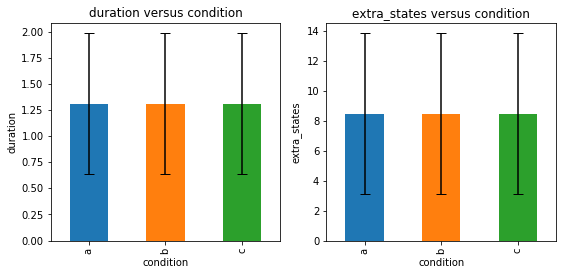

In [99]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def plot_grouped(df, title=""):
    group_means = df.groupby("condition").mean()
    group_stds = df.groupby("condition").std()
    # mean is bar height
    # error bars are one standard deviation
    fig = plt.figure(figsize=(14,4))
    for i, attribute in enumerate(["duration", "extra_states"]):    
        ax = fig.add_subplot(1,3,i+1)
        group_means[attribute].plot.bar(yerr=group_stds[attribute], capsize=5)
        ax.set_ylabel(attribute)
        ax.set_title("{attr} versus condition".format(attr=attribute))    
    fig.suptitle(title)
    
    
# plot for *all* the tasks, averaged together
plot_grouped(merged)

In [100]:
# plot the textual form of the results
merged.groupby("condition").describe(percentiles=[0.5])

actions                          duration                         \
            count mean  std  min  50%  max    count  mean   std  min   50%   
condition                                                                    
a            25.0  0.0  0.0  0.0  0.0  0.0     25.0  1.31  0.67  0.3  1.44   
b            25.0  0.0  0.0  0.0  0.0  0.0     25.0  1.31  0.67  0.3  1.44   
c            25.0  0.0  0.0  0.0  0.0  0.0     25.0  1.31  0.67  0.3  1.44   

                extra_states                              
            max        count  mean   std  min  50%   max  
condition                                                 
a          2.25         25.0  8.48  5.38  0.0  9.0  16.0  
b          2.25         25.0  8.48  5.38  0.0  9.0  16.0  
c          2.25         25.0  8.48  5.38  0.0  9.0  16.0

## Detailed plots: task breakdown
The plots below show the same results, but broken down for each of the five tasks, so that any differences that only appear in certain tasks are more visible. This is a more detailed view of the data.

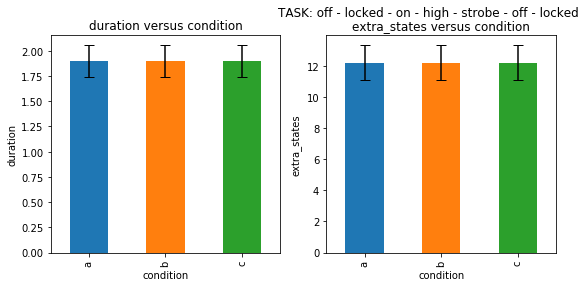

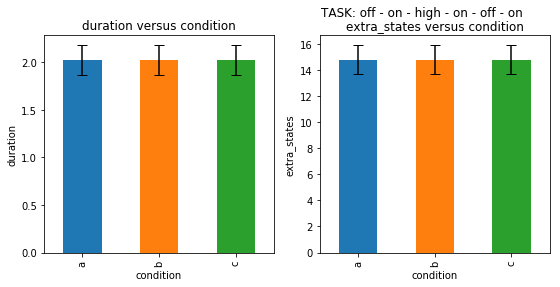

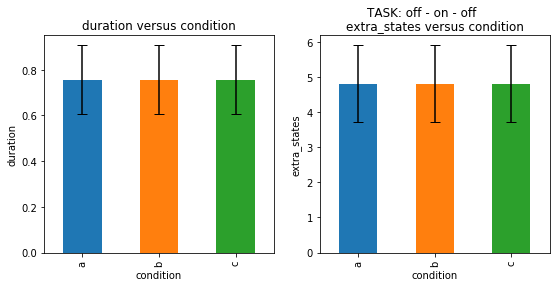

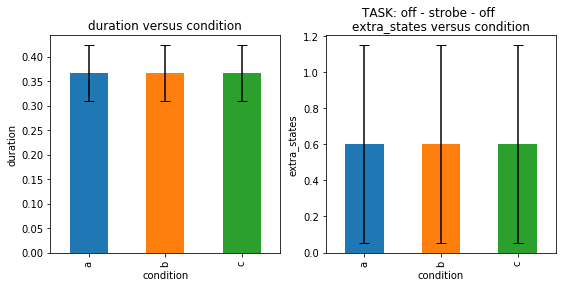

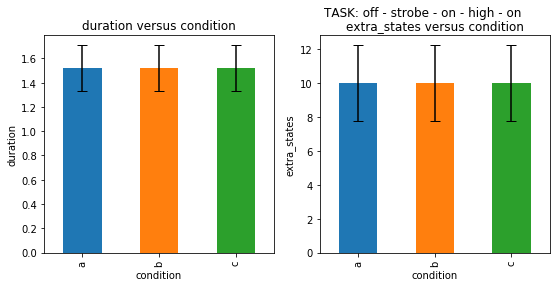

In [101]:
# mean is bar height
# error bars are one standard deviation
tasks = merged.groupby("task_name")

for task_name, task in tasks:    
    # plot for each task separately
    plot_grouped(task, title="TASK: " + task_name)

## Write up: reporting on your conclusions
In the cell below, write a short report explaining your *interpretation* of the results you obtained (~250 words).  Consider the following questions in your write up:

* What do the graphs indicate about the usability of your design?
* What influence did the different experimental conditions have on the usability of your interface?
* How confident are you in your conclusions?
* How would you adapt your design to work better, *in light of the experimental results*?
* What other metrics would have been useful to measure the usability of your design?

------





**Write your report here. (note: double-click on this text to edit it)**

------

### SUBMISSION INSTRUCTIONS
Make sure the graphs from the experiment are visible and that your report is written up clearly. **Save the notebook as ipynb and as a PDF**.
Upload the `4_experimental_analysis.ipynb` and your PDF file on Moodle.